In [1]:
##################################################
## Project: DGRPool
## Script purpose: Stats over GWAS computation
## Version: 1.0.0
## Date Created: 2023 Mar 24
## Date Modified: 2023 Mar 26
## Author: Vincent Gardeux (vincent.gardeux@epfl.ch)
##################################################

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# I load the file that I generated with R
# Note: My initial goal was to do this in R, but it's ~1000 times slower than in Python (especially for subsetting big dataframe), so I switched to Python
data_gwas = pd.read_csv('/data/gardeux/DGRPool/data.gwas_24_03_23.filtered.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='"', engine='pyarrow')
# Check size
data_gwas.shape # (1891456, 861)

(1891456, 861)

In [2]:
# Create index using the unique variant id
data_gwas.index = data_gwas["id"]
# Separate the variant annotation from the results
annot_gwas = data_gwas.iloc[:, 3:9]
data_gwas = data_gwas.iloc[:, 9:861]
# Check size again
data_gwas.shape # (1891456, 852)

(1891456, 852)

In [3]:
# Subsetting the dataset for only certain p-value thresholds
nb_signif_0_05 = data_gwas[data_gwas <= 0.05].count()
nb_signif_1E2 = data_gwas[data_gwas <= 0.01].count()
nb_signif_1E3 = data_gwas[data_gwas <= 0.001].count()
nb_signif_1E4 = data_gwas[data_gwas <= 0.0001].count()
nb_signif_1E5 = data_gwas[data_gwas <= 0.00001].count()
nb_signif_1E6 = data_gwas[data_gwas <= 0.000001].count()
nb_signif_1E7 = data_gwas[data_gwas <= 0.0000001].count()
nb_signif_1E8 = data_gwas[data_gwas <= 0.00000001].count()
nb_signif_2_25E8 = data_gwas[data_gwas <= 2.25E-8].count()

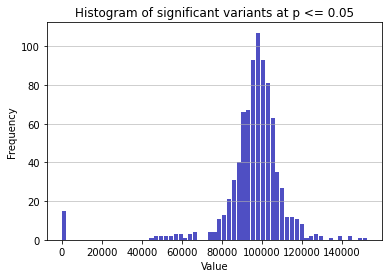

In [4]:
# Plot distribution of number of significant variant, across all phenotypes
n, bins, patches = plt.hist(x=nb_signif_0_05, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 0.05')
plt.savefig('hist_signif_variants_0.05.pdf')

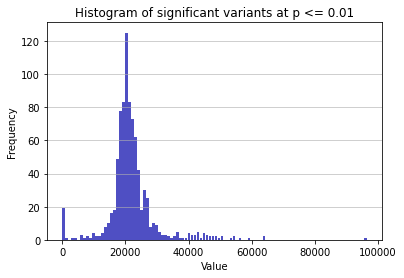

In [5]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nb_signif_1E2, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 0.01')
plt.savefig('hist_signif_variants_0.01.pdf')

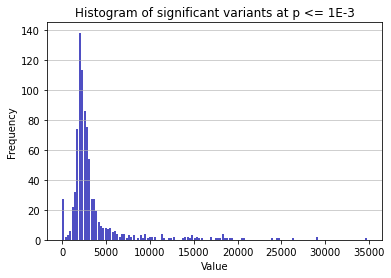

In [6]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nb_signif_1E3, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 1E-3')
plt.savefig('hist_signif_variants_1E3.pdf')

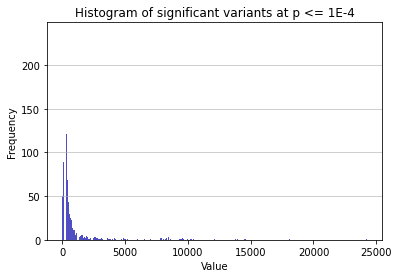

In [7]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nb_signif_1E4, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 1E-4')
plt.savefig('hist_signif_variants_1E4.pdf')

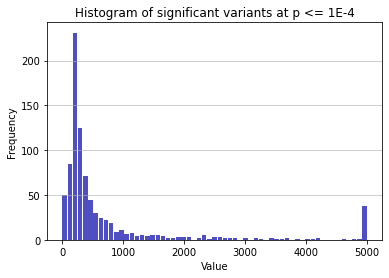

In [8]:
# An "interface" to matplotlib.axes.Axes.hist() method
nb_signif_1E4_enhanced = np.copy(nb_signif_1E4)
nb_signif_1E4_enhanced[nb_signif_1E4_enhanced > 5000] = 5000
n, bins, patches = plt.hist(x=nb_signif_1E4_enhanced, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 1E-4')
plt.savefig('hist_signif_variants_1E4_enhanced.pdf')

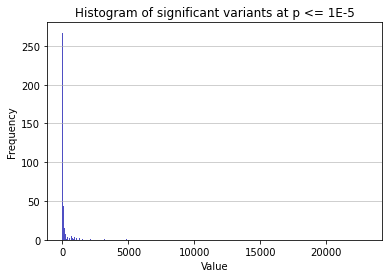

In [9]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nb_signif_1E5, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 1E-5')
plt.savefig('hist_signif_variants_1E5.pdf')

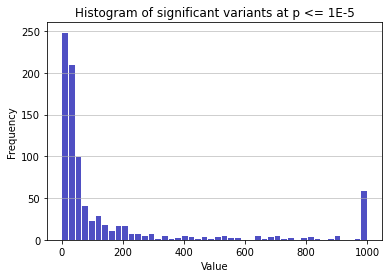

In [25]:
# An "interface" to matplotlib.axes.Axes.hist() method
nb_signif_1E5_enhanced = np.copy(nb_signif_1E5)
nb_signif_1E5_enhanced[nb_signif_1E5_enhanced > 1000] = 1000
n, bins, patches = plt.hist(x=nb_signif_1E5_enhanced, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 1E-5')
plt.savefig('hist_signif_variants_1E5_enhanced.pdf')

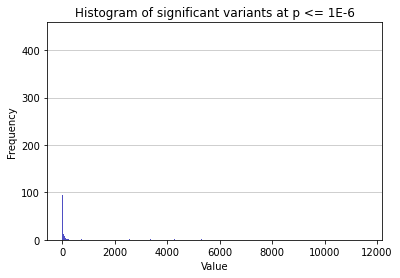

In [11]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nb_signif_1E6, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 1E-6')
plt.savefig('hist_signif_variants_1E6.pdf')

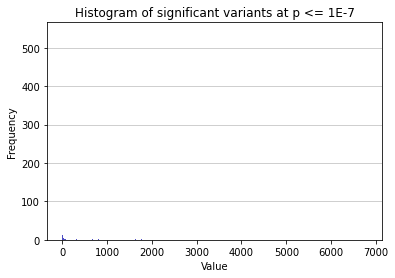

In [12]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nb_signif_1E7, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 1E-7')
plt.savefig('hist_signif_variants_1E7.pdf')

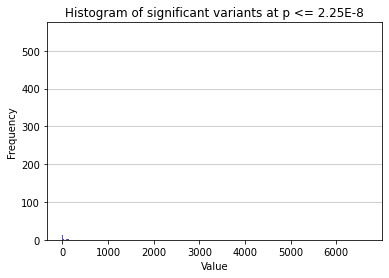

In [13]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nb_signif_2_25E8, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 2.25E-8')
plt.savefig('hist_signif_variants_2.25E8.pdf')

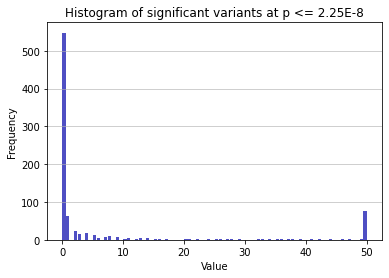

In [14]:
# An "interface" to matplotlib.axes.Axes.hist() method
# Enhanced view
nb_signif_2_25E8_enhanced=np.copy(nb_signif_2_25E8)
nb_signif_2_25E8_enhanced[nb_signif_2_25E8_enhanced > 50] = 50
n, bins, patches = plt.hist(x=nb_signif_2_25E8_enhanced, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of significant variants at p <= 2.25E-8')
plt.savefig('hist_signif_variants_2.25E8_enhanced.pdf')

In [15]:
# Prepare DataFrame for Manhattan
data_distrib = annot_gwas.copy()
data_distrib = data_distrib.iloc[:,0:2]
#data_distrib['P'] = data_gwas.iloc[:,1]
#data_distrib['SNP'] = data_distrib.index
data_distrib.rename(columns={"chr": "CHR", "pos": "BP"}, inplace=True)
#data_distrib['CHR'] = data_distrib['CHR'].map(dict(zip(["2L", "2R", "3L", "3R", "4", "X"], range(1,7))), na_action='ignore')

# Add desired value to be plotted in Manhattan
col_name = 'Occ_0.01'
threshold = 0.01
data_distrib[col_name] = data_gwas.le(threshold, axis = 0).sum(axis = 1)

data_distrib

,CHR,BP,Occ_0.01
id,,,
2L_10000016_SNP,2L,10000016,6
2L_10000033_SNP,2L,10000033,6
2L_10000089_SNP,2L,10000089,9
2L_10000135_SNP,2L,10000135,6
2L_10000234_SNP,2L,10000234,9
...,...,...,...
X_9999687_SNP,X,9999687,14
X_999989_SNP,X,999989,2
X_999993_SNP,X,999993,5


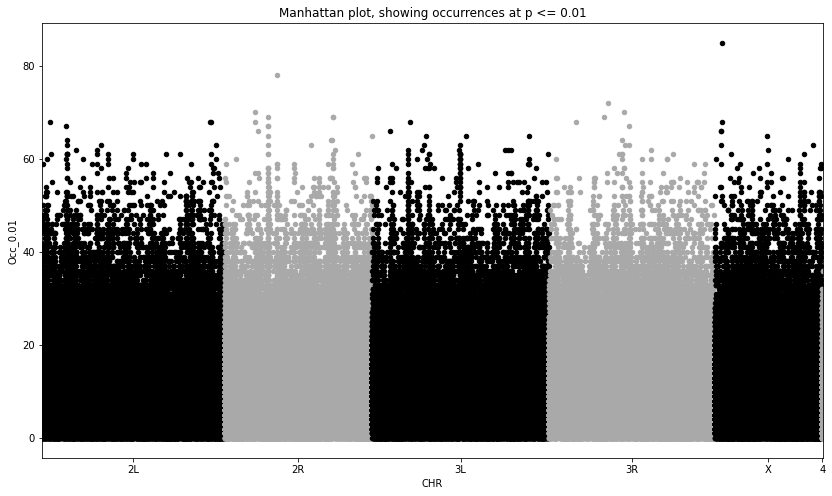

In [16]:
## Manhattan plot using Matplotlib. Ref = https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib

# Format chromosomes
data_distrib.CHR = data_distrib.CHR.astype('category')
data_distrib.CHR = data_distrib.CHR.cat.set_categories(["2L", "2R", "3L", "3R", "X", "4"], ordered=True)
data_distrib = data_distrib.sort_values('CHR')

# How to plot gene vs. value and colour it by chromosome?
data_distrib['ind'] = range(len(data_distrib)) # Simply plot by index
data_distrib_grouped = data_distrib.groupby(('CHR'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black','darkgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(data_distrib_grouped):
    group.plot(kind='scatter', x='ind', y=col_name,color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(data_distrib)])
#ax.set_ylim([0, 10])

# x axis label
ax.set_xlabel('CHR')

# Title
plt.title('Manhattan plot, showing occurrences at p <= 0.01')

# save in pdf
plt.savefig('manhattan.occurrences.0.01.pdf')

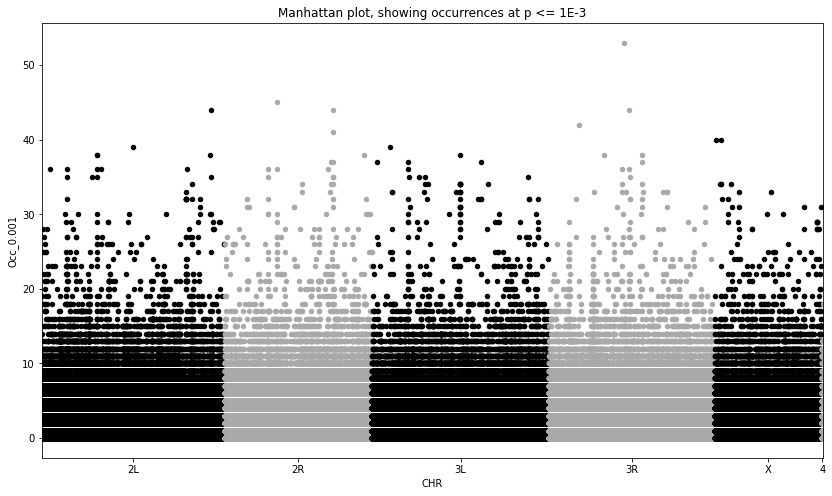

In [17]:
# Prepare DataFrame for Manhattan
data_distrib = annot_gwas.copy()
data_distrib = data_distrib.iloc[:,0:2]
#data_distrib['P'] = data_gwas.iloc[:,1]
#data_distrib['SNP'] = data_distrib.index
data_distrib.rename(columns={"chr": "CHR", "pos": "BP"}, inplace=True)
#data_distrib['CHR'] = data_distrib['CHR'].map(dict(zip(["2L", "2R", "3L", "3R", "4", "X"], range(1,7))), na_action='ignore')

# Add desired value to be plotted in Manhattan
col_name = 'Occ_0.001'
threshold = 0.001
data_distrib[col_name] = data_gwas.le(threshold, axis = 0).sum(axis = 1)

## Manhattan plot using Matplotlib. Ref = https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib

# Format chromosomes
data_distrib.CHR = data_distrib.CHR.astype('category')
data_distrib.CHR = data_distrib.CHR.cat.set_categories(["2L", "2R", "3L", "3R", "X", "4"], ordered=True)
data_distrib = data_distrib.sort_values('CHR')

# How to plot gene vs. value and colour it by chromosome?
data_distrib['ind'] = range(len(data_distrib)) # Simply plot by index
data_distrib_grouped = data_distrib.groupby(('CHR'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black','darkgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(data_distrib_grouped):
    group.plot(kind='scatter', x='ind', y=col_name,color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(data_distrib)])
#ax.set_ylim([0, 10])

# x axis label
ax.set_xlabel('CHR')

# Title
plt.title('Manhattan plot, showing occurrences at p <= 1E-3')

# save in pdf
plt.savefig('manhattan.occurrences.1E3.pdf')

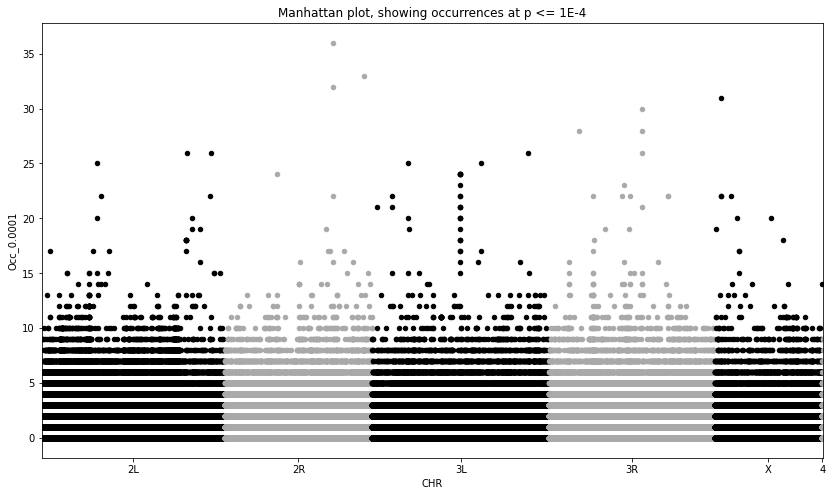

In [18]:
# Prepare DataFrame for Manhattan
data_distrib = annot_gwas.copy()
data_distrib = data_distrib.iloc[:,0:2]
#data_distrib['P'] = data_gwas.iloc[:,1]
#data_distrib['SNP'] = data_distrib.index
data_distrib.rename(columns={"chr": "CHR", "pos": "BP"}, inplace=True)
#data_distrib['CHR'] = data_distrib['CHR'].map(dict(zip(["2L", "2R", "3L", "3R", "4", "X"], range(1,7))), na_action='ignore')

# Add desired value to be plotted in Manhattan
col_name = 'Occ_0.0001'
threshold = 0.0001
data_distrib[col_name] = data_gwas.le(threshold, axis = 0).sum(axis = 1)

## Manhattan plot using Matplotlib. Ref = https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib

# Format chromosomes
data_distrib.CHR = data_distrib.CHR.astype('category')
data_distrib.CHR = data_distrib.CHR.cat.set_categories(["2L", "2R", "3L", "3R", "X", "4"], ordered=True)
data_distrib = data_distrib.sort_values('CHR')

# How to plot gene vs. value and colour it by chromosome?
data_distrib['ind'] = range(len(data_distrib)) # Simply plot by index
data_distrib_grouped = data_distrib.groupby(('CHR'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black','darkgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(data_distrib_grouped):
    group.plot(kind='scatter', x='ind', y=col_name,color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(data_distrib)])
#ax.set_ylim([0, 10])

# x axis label
ax.set_xlabel('CHR')

# Title
plt.title('Manhattan plot, showing occurrences at p <= 1E-4')

# save in pdf
plt.savefig('manhattan.occurrences.1E4.pdf')

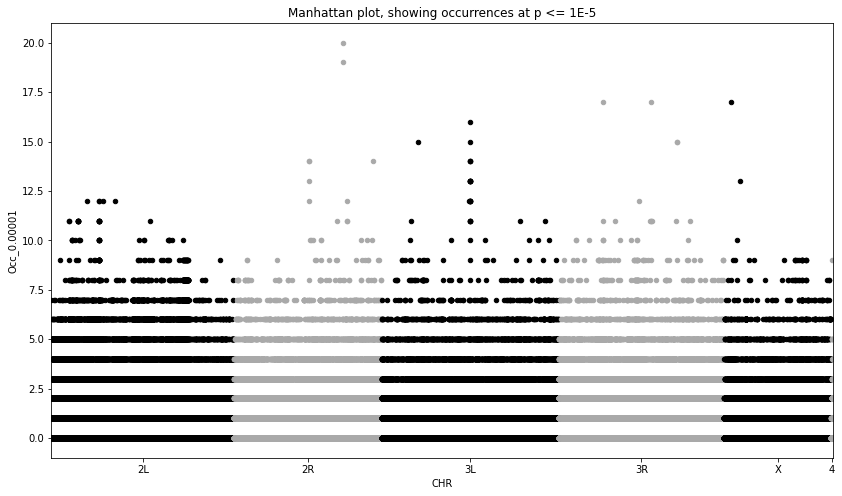

In [19]:
# Prepare DataFrame for Manhattan
data_distrib = annot_gwas.copy()
data_distrib = data_distrib.iloc[:,0:2]
#data_distrib['P'] = data_gwas.iloc[:,1]
#data_distrib['SNP'] = data_distrib.index
data_distrib.rename(columns={"chr": "CHR", "pos": "BP"}, inplace=True)
#data_distrib['CHR'] = data_distrib['CHR'].map(dict(zip(["2L", "2R", "3L", "3R", "4", "X"], range(1,7))), na_action='ignore')

# Add desired value to be plotted in Manhattan
col_name = 'Occ_0.00001'
threshold = 0.00001
data_distrib[col_name] = data_gwas.le(threshold, axis = 0).sum(axis = 1)

## Manhattan plot using Matplotlib. Ref = https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib

# Format chromosomes
data_distrib.CHR = data_distrib.CHR.astype('category')
data_distrib.CHR = data_distrib.CHR.cat.set_categories(["2L", "2R", "3L", "3R", "X", "4"], ordered=True)
data_distrib = data_distrib.sort_values('CHR')

# How to plot gene vs. value and colour it by chromosome?
data_distrib['ind'] = range(len(data_distrib)) # Simply plot by index
data_distrib_grouped = data_distrib.groupby(('CHR'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black','darkgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(data_distrib_grouped):
    group.plot(kind='scatter', x='ind', y=col_name,color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(data_distrib)])
#ax.set_ylim([0, 10])

# x axis label
ax.set_xlabel('CHR')

# Title
plt.title('Manhattan plot, showing occurrences at p <= 1E-5')

# save in pdf
plt.savefig('manhattan.occurrences.1E5.pdf')

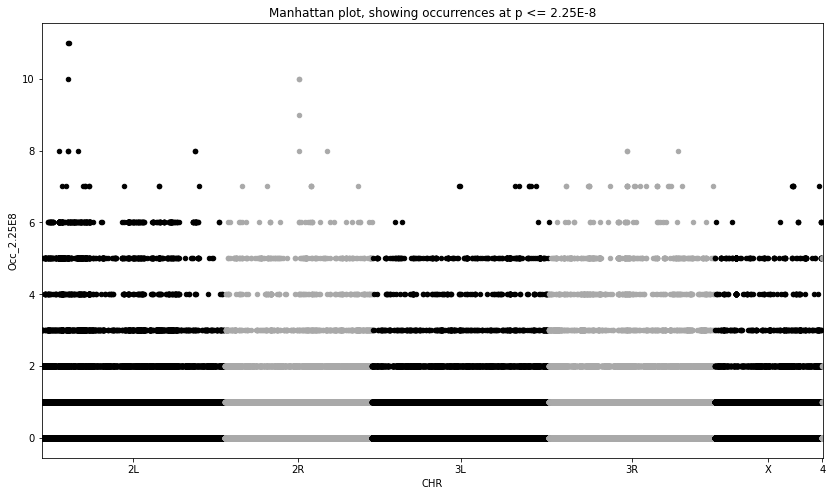

In [20]:
# Prepare DataFrame for Manhattan
data_distrib = annot_gwas.copy()
data_distrib = data_distrib.iloc[:,0:2]
#data_distrib['P'] = data_gwas.iloc[:,1]
#data_distrib['SNP'] = data_distrib.index
data_distrib.rename(columns={"chr": "CHR", "pos": "BP"}, inplace=True)
#data_distrib['CHR'] = data_distrib['CHR'].map(dict(zip(["2L", "2R", "3L", "3R", "4", "X"], range(1,7))), na_action='ignore')

# Add desired value to be plotted in Manhattan
col_name = 'Occ_2.25E8'
threshold = 2.25E-8
data_distrib[col_name] = data_gwas.le(threshold, axis = 0).sum(axis = 1)

## Manhattan plot using Matplotlib. Ref = https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib

# Format chromosomes
data_distrib.CHR = data_distrib.CHR.astype('category')
data_distrib.CHR = data_distrib.CHR.cat.set_categories(["2L", "2R", "3L", "3R", "X", "4"], ordered=True)
data_distrib = data_distrib.sort_values('CHR')

# How to plot gene vs. value and colour it by chromosome?
data_distrib['ind'] = range(len(data_distrib)) # Simply plot by index
data_distrib_grouped = data_distrib.groupby(('CHR'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black','darkgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(data_distrib_grouped):
    group.plot(kind='scatter', x='ind', y=col_name,color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(data_distrib)])
#ax.set_ylim([0, 10])

# x axis label
ax.set_xlabel('CHR')

# Title
plt.title('Manhattan plot, showing occurrences at p <= 2.25E-8')

# save in pdf
plt.savefig('manhattan.occurrences.2.25E8.pdf')

In [21]:
data_distrib[data_distrib["Occ_2.25E8"] > 7]

,CHR,BP,Occ_2.25E8,ind
id,,,,
2L_4834522_SNP,2L,4834522,8,41583
2L_2433065_SNP,2L,2433065,11,64104
2L_2436718_SNP,2L,2436718,10,64643
2L_2436690_SNP,2L,2436690,8,64645
2L_2435267_SNP,2L,2435267,8,64700
2L_2391934_SNP,2L,2391934,11,65004
2L_3178971_DEL,2L,3178971,8,88490
2L_1997081_SNP,2L,1997081,8,371323
2L_1997072_SNP,2L,1997072,8,371328


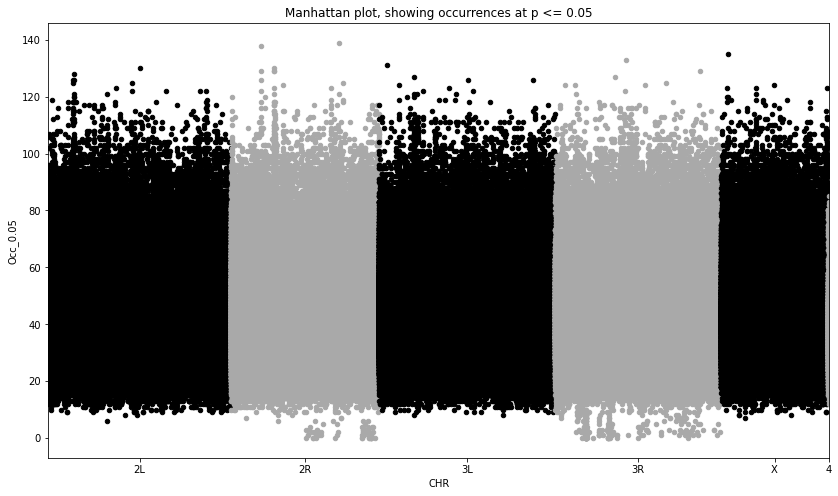

In [22]:
# Prepare DataFrame for Manhattan
data_distrib = annot_gwas.copy()
data_distrib = data_distrib.iloc[:,0:2]
#data_distrib['P'] = data_gwas.iloc[:,1]
#data_distrib['SNP'] = data_distrib.index
data_distrib.rename(columns={"chr": "CHR", "pos": "BP"}, inplace=True)
#data_distrib['CHR'] = data_distrib['CHR'].map(dict(zip(["2L", "2R", "3L", "3R", "4", "X"], range(1,7))), na_action='ignore')

# Add desired value to be plotted in Manhattan
col_name = 'Occ_0.05'
threshold = 0.05
data_distrib[col_name] = data_gwas.le(threshold, axis = 0).sum(axis = 1)

## Manhattan plot using Matplotlib. Ref = https://www.python-graph-gallery.com/manhattan-plot-with-matplotlib

# Format chromosomes
data_distrib.CHR = data_distrib.CHR.astype('category')
data_distrib.CHR = data_distrib.CHR.cat.set_categories(["2L", "2R", "3L", "3R", "X", "4"], ordered=True)
data_distrib = data_distrib.sort_values('CHR')

# How to plot gene vs. value and colour it by chromosome?
data_distrib['ind'] = range(len(data_distrib)) # Simply plot by index
data_distrib_grouped = data_distrib.groupby(('CHR'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['black','darkgrey']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(data_distrib_grouped):
    group.plot(kind='scatter', x='ind', y=col_name,color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(data_distrib)])
#ax.set_ylim([0, 10])

# x axis label
ax.set_xlabel('CHR')

# Title
plt.title('Manhattan plot, showing occurrences at p <= 0.05')

# save in pdf
plt.savefig('manhattan.occurrences.0.05.pdf')

Text(0.5, 1.0, 'Number of missing values in low variants (<7 occurrences) - 293 values')

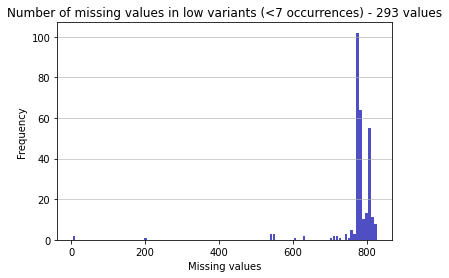

In [23]:
low_variants = data_distrib[data_distrib['Occ_0.05'] < 7].index
values_low = data_gwas.loc[low_variants].isna().sum(axis=1)
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=values_low, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Missing values')
plt.ylabel('Frequency')
plt.title('Number of missing values in low variants (<7 occurrences) - ' + str(len(low_variants)) + ' values' )

This shows that the bottom variant in the 0.05 plot are simply variants with lots of missing values
